# Fáza 3 - strojové učenie

Pri dátovej analýze nemusí byť naším cieľom získať len znalosti obsiahnuté v aktuálnych dátach, ale aj natrénovať model, ktorý bude schopný robiť rozumné predikcie pre nové pozorovania pomocou strojového učenia.
V tejto fáze sa od Vás očakáva:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats as sm_stats

import datetime
import re
import category_encoders as ce
from sklearn.impute import SimpleImputer, KNNImputer
from numpy import percentile

import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, SelectFromModel
from sklearn.feature_selection import mutual_info_regression, chi2, f_regression, f_classif
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from sklearn.metrics import classification_report
from IPython.display import HTML
from IPython.display import Image 
from sklearn.tree import export_graphviz

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
from Smrecek_Langova_Script_Phase2 import *

In [3]:
def pipelineGenerator(na_method='remove', na_strategy=None, outliers_method='nothing', 
                      tranformation_method='nothing', select_attributes='all'):
    pipeline =  Pipeline([
        ('handleCategorical', handleCategorical()),
        ('handleNA', handleNA(na_method, na_strategy)), # possible: 'nothing'; 'remove'; 'replace', 'mean'; 'replace', 'median'; 'replace', 'kNN'
        ('handleOutliers', handleOutliers(outliers_method)), # possible: 'nothing'; 'remove'; 'replace'
        ('handleTransformations', handleTransformations(tranformation_method)), # possible: 'nothing'; 'power'; 'quan'; 'minmax'; 'standard'
        ('handleSelection', handleSelection(select_attributes)) # possible: 'all'; list of attributes
    ])
    return pipeline

In [4]:
original_data = phase1()
pipeline1 = pipelineGenerator()
preprocessed_data1 = pipeline1.fit_transform(original_data)

C:\Users\PeterSmrecek\Documents\IAU-repository\IAU-virtual\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [5]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data1.drop(["indicator"], axis=1), 
                                                    preprocessed_data1['indicator'], test_size=0.33, random_state=1)

In [6]:
X_train

,race,blood_group,sex_F,sex_M,weight,hemoglobin,alp,etytr,alt,erytrocyty,hbver,hematokrit,er-cv,leukocyty,smoker,relationship,ast,trombocyty,state,age
6837,1,2,0,1,83.28014,8.75757,25.74621,7.49191,10.52078,8.98546,8.58355,9.66952,40.25132,9.42163,0,2,47.27342,7.94432,6,33
7948,3,1,0,1,117.93586,8.27932,35.80562,6.84522,14.51516,9.39627,6.65911,9.69455,40.97452,9.33651,0,5,70.06031,8.59541,9,106
1972,4,5,0,1,78.89708,7.79869,44.11900,8.20369,2.52581,6.63855,8.43833,8.83920,29.41450,6.62939,1,5,39.02366,7.64652,22,72
293,1,6,1,0,108.28565,7.02105,79.91355,7.82110,2.27397,6.48045,8.48469,6.85593,28.28271,8.97391,0,1,66.35485,8.30599,25,70
322,1,6,0,1,76.36908,7.32766,72.71074,5.27480,10.36320,8.82948,7.26556,10.84783,57.20809,9.68675,1,1,63.73370,6.41365,28,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2,8,0,1,88.39383,9.49635,13.65872,5.89053,3.66586,7.28282,5.98484,7.54323,82.69901,8.14612,0,4,52.50049,8.40950,48,107
8086,4,1,0,1,51.37146,6.57346,85.48750,9.20162,2.21881,6.80762,7.14763,11.15912,49.46778,6.13904,0,3,34.07211,8.10065,9,84
930,4,1,1,0,34.57981,8.48715,28.75341,5.04780,3.28239,7.31494,8.32396,7.94284,72.93099,7.94581,1,5,45.71035,7.39289,36,80
5359,4,6,0,1,52.26847,5.12400,56.60870,9.06252,1.75278,6.09368,5.84886,8.74435,77.38258,8.20391,0,6,52.51235,6.71362,15,27


In [7]:
X_test

,race,blood_group,sex_F,sex_M,weight,hemoglobin,alp,etytr,alt,erytrocyty,hbver,hematokrit,er-cv,leukocyty,smoker,relationship,ast,trombocyty,state,age
6825,2,6,0,1,90.69947,6.11603,90.29911,4.85303,1.76286,6.25427,9.44604,5.60110,40.47780,8.62587,0,3,17.07035,6.25445,44,58
1326,4,1,0,1,80.43911,8.43330,30.51162,6.70085,0.71128,5.09262,7.82697,8.45517,89.65581,8.13924,0,5,66.64161,6.55809,19,59
4993,1,6,1,0,89.55935,5.22120,70.14578,3.85843,6.24518,8.12738,7.73202,13.75801,15.47201,9.47929,0,5,39.23309,8.10311,52,7
714,1,2,0,1,0.83884,7.88875,48.93919,7.72165,3.57786,7.47102,9.37228,6.63526,54.56812,9.08624,0,3,60.99084,8.04914,25,113
9650,4,7,0,1,73.24306,5.62364,78.80910,4.38836,3.49372,7.53172,7.12068,5.04109,50.32212,8.64519,0,4,36.21442,7.32733,4,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,4,1,1,0,63.72511,7.98254,43.29304,5.83024,6.83100,8.54906,6.43300,8.80753,41.72916,9.50875,1,3,38.89882,8.65406,25,40
4937,1,1,0,1,69.15843,7.06676,79.14220,6.94416,4.90615,7.79693,6.72981,7.45459,40.63908,7.53378,0,6,73.46613,7.29451,3,0
6964,4,5,0,1,54.87571,7.60316,58.78030,7.53987,1.28584,6.55055,7.52357,8.01435,60.73722,8.94651,0,4,53.37077,7.23917,13,6
4825,1,7,1,0,101.49382,5.63097,78.55773,2.71626,5.30641,8.15311,7.99008,5.81543,32.55766,8.44211,0,4,49.72585,9.02606,14,112


In [8]:
y_train

6837    0.0
7948    0.0
1972    1.0
293     0.0
322     0.0
       ... 
2985    0.0
8086    1.0
930     0.0
5359    1.0
243     0.0
Name: indicator, Length: 6480, dtype: float64

In [9]:
y_test

6825    0.0
1326    1.0
4993    0.0
714     0.0
9650    0.0
       ... 
9518    1.0
4937    1.0
6964    0.0
4825    0.0
9639    1.0
Name: indicator, Length: 3192, dtype: float64

## 1. Manuálne vytvorenie a vyhodnotenie rozhodovacích pravidiel pre klasifikáciu (5b)
* Naimplementujte 1R algorithm (1R or OneR), ktorý je jednoduchá klasifikácia t.j. rozhodnutie na základe jedného atribútu. Môžete implementovať komplikovanejšie t.j. zahŕňajúce viacero atribútov (ich kombinácie).
* Pravidlá by v tomto kroku mali byť vytvorené manuálne na základe pozorovaných závislostí v dátach. Vyhodnoťte klasifikátor pomocou metrík accuracy, precision a recall.

### Vizualizácia atribútov

C:\Users\PETERS~1\AppData\Local\Temp/ipykernel_19188/818045578.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_01 = plt.subplots(figsize = (8, 3))


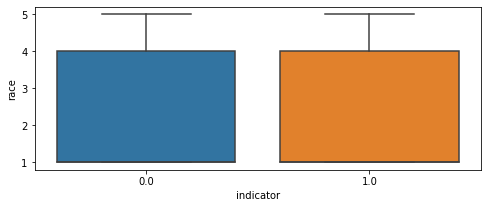

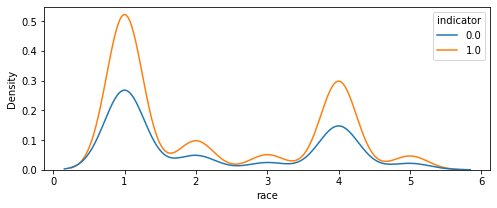

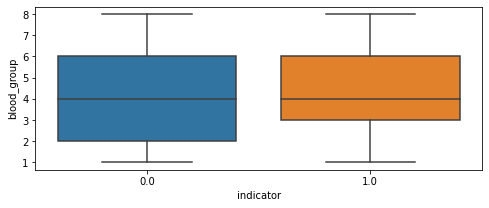

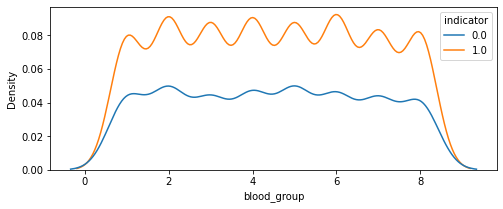

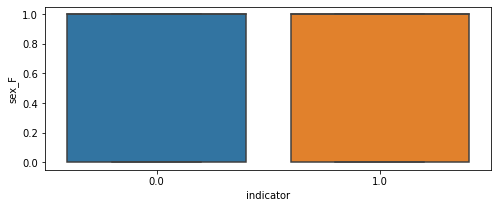

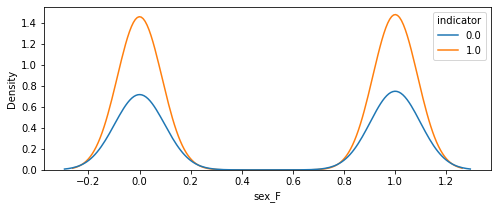

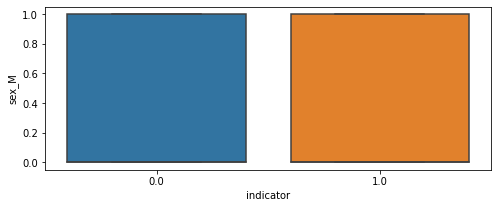

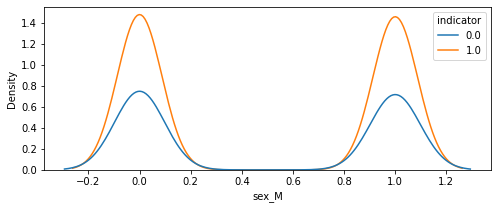

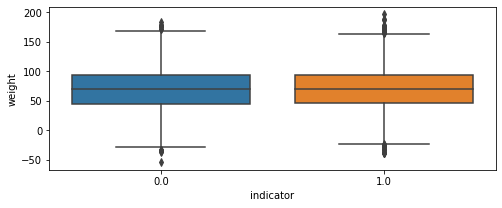

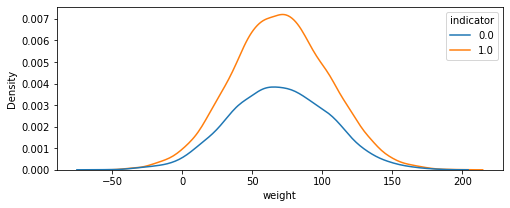

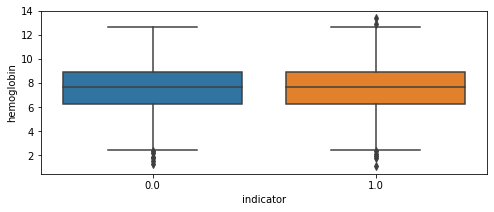

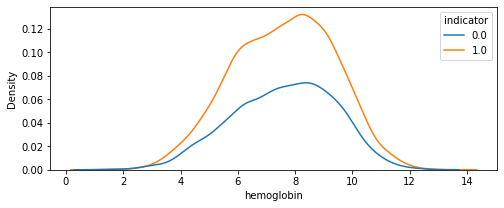

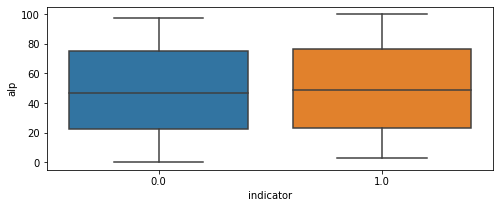

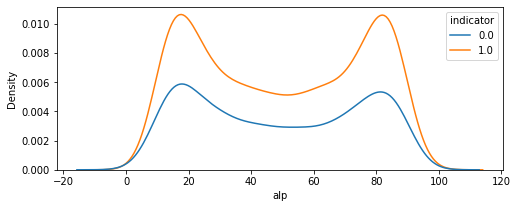

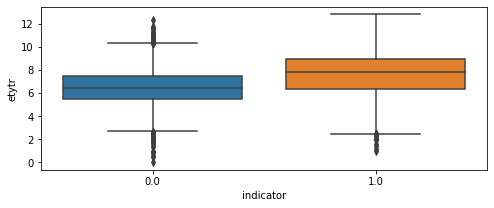

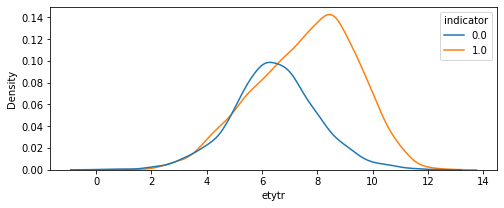

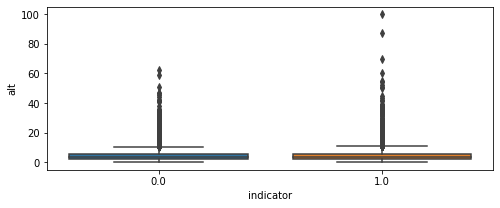

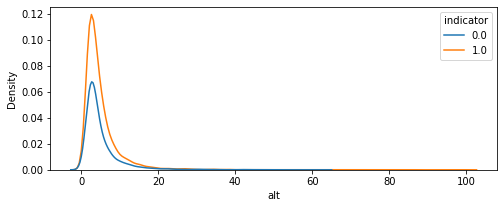

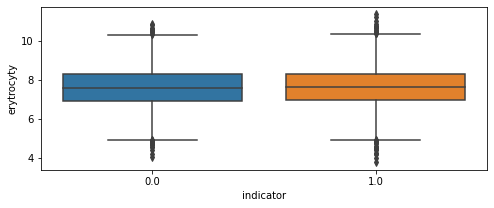

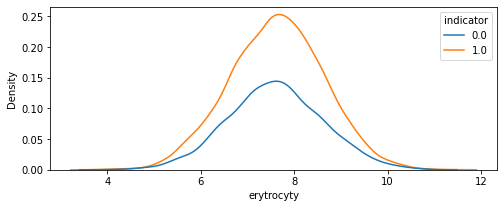

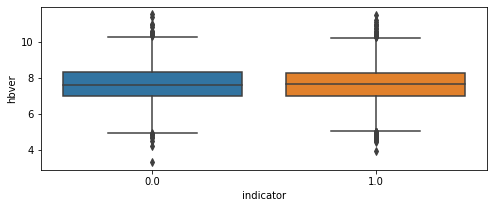

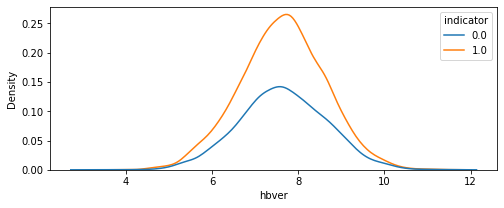

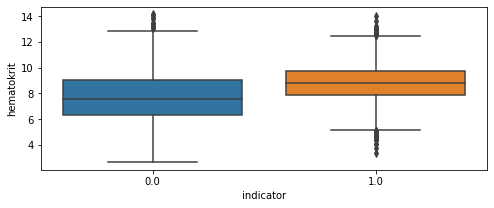

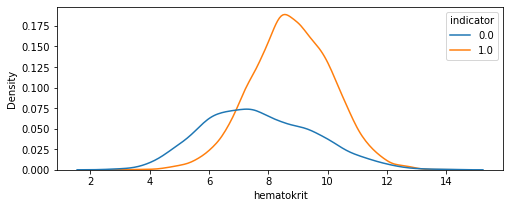

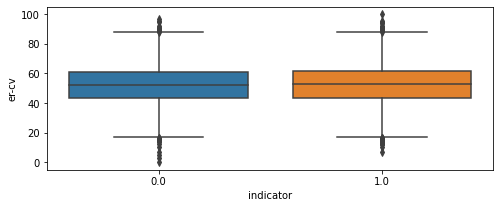

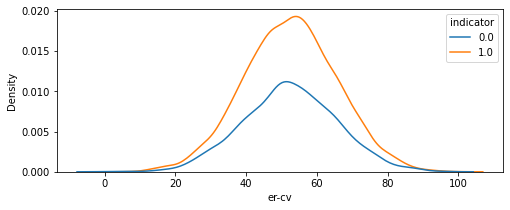

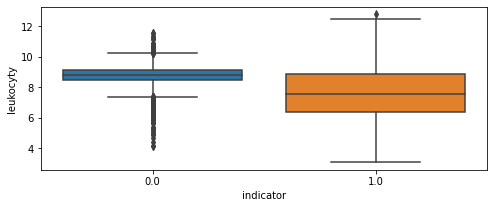

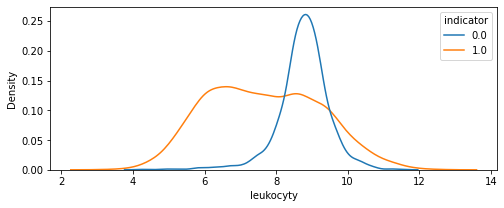

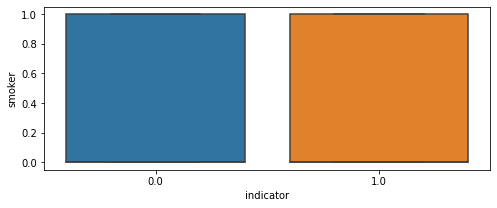

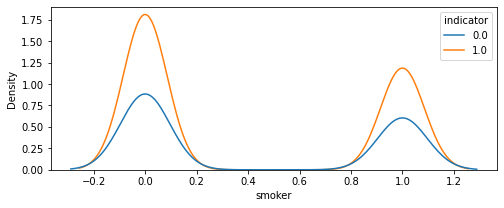

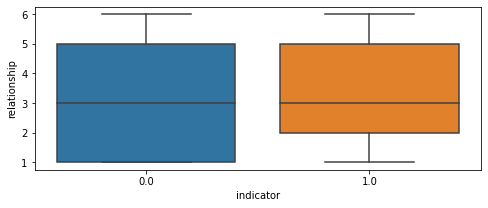

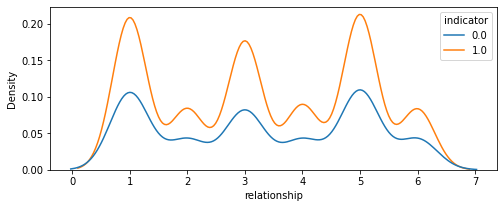

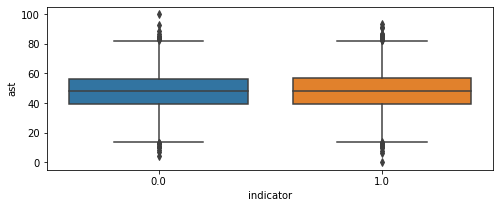

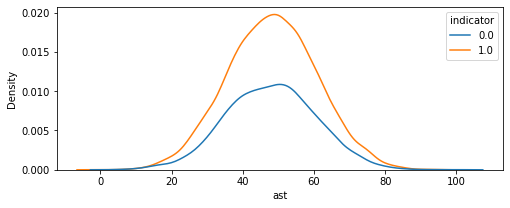

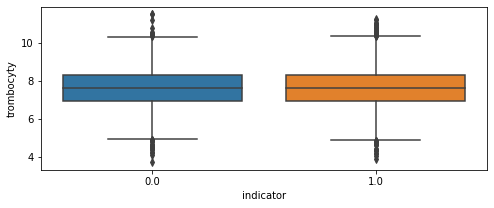

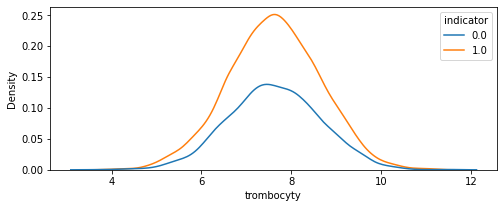

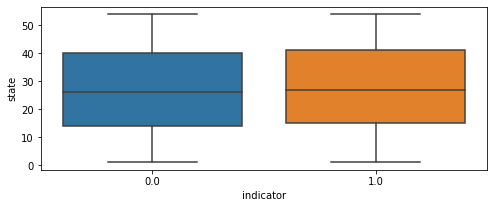

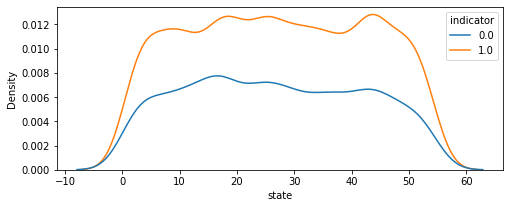

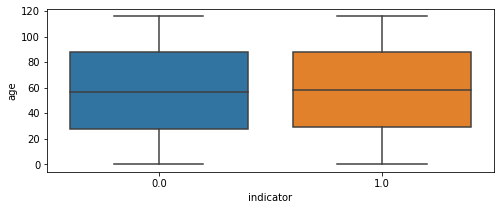

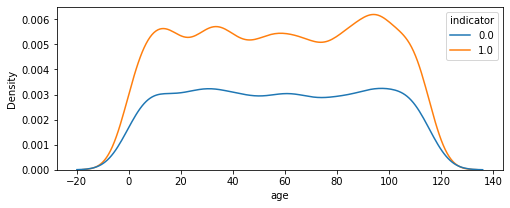

In [10]:
# attributes = list_attributes.copy()
attributes = list(preprocessed_data1.columns)
attributes.remove('indicator')
for col in attributes:
    fig_01 = plt.subplots(figsize = (8, 3))
    sns.boxplot(x='indicator', y=col, data=preprocessed_data1)
    fig_02 = plt.subplots(figsize = (8, 3))
    sns.kdeplot(data=preprocessed_data1, x=col, hue="indicator")

### Dummy OneR

In [11]:
def rule1(row):
    if row['leukocyty'] > 8.1 and row['leukocyty'] < 9.5:
        return 0
    else:
        return 1

def oner(data):
    return data.apply(lambda row: rule1(row), axis=1)

In [12]:
pred = oner(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

         0.0       0.61      0.76      0.68      2294
         1.0       0.85      0.74      0.79      4186

    accuracy                           0.75      6480
   macro avg       0.73      0.75      0.73      6480
weighted avg       0.77      0.75      0.75      6480



In [13]:
pred = oner(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.63      0.77      0.69      1179
         1.0       0.85      0.73      0.78      2013

    accuracy                           0.75      3192
   macro avg       0.74      0.75      0.74      3192
weighted avg       0.77      0.75      0.75      3192



### OneR

In [14]:
class OneRClassifier():
    def __init__(self, number_of_breakpoints=2, silent=True):
        self.number_of_breakpoints = number_of_breakpoints
        self.silent = silent
        self.dict_of_intervals = {}
        self.list_attributes = []

    def oner(self, X_col, y_data):
        df = pd.concat([X_col, y_data], axis=1)
        df = df.sort_values(by=[X_col.name])  
        part_def = len(df) // (self.number_of_breakpoints + 1)
        
        parts = []
        for i in range(self.number_of_breakpoints):
            parts.append(part_def*(i + 1))
        
        breakpoints = []
        start = 0
        end = len(df)
        ranges = []
        for index, part in enumerate(parts):
            breakpoints.append(df.iloc[part][X_col.name])
            if index == 0:
                ranges.append(range(start , part))
            elif index == (len(parts) - 1):
                ranges.append(range(parts[index-1], part))
                ranges.append(range(part, end))
            else:
                ranges.append(range(parts[index-1], part))
        
        values = []
        for r in ranges:
            subframe = df.iloc[r][y_data.name]
            ln = len(subframe)
            sm = subframe.sum()
            if sm/ln >= 0.5:
                values.append(1)
            else:
                values.append(0)

        return [breakpoints, values]    
    
    def fit(self, X_data, y_data):
        self.list_attributes = list(X_data.columns)
        for att in self.list_attributes:
            self.dict_of_intervals[att] = self.oner(X_data[att], y_data)
            self.dict_of_intervals[att].append(self.calculate_error(X_data, y_data, att))
        return self
    
    def apply_rule_1_attr(self, row, attr):
        for index, value in enumerate(self.dict_of_intervals[attr][0]):
            if row[attr] < value:
                return self.dict_of_intervals[attr][1][index]
        return self.dict_of_intervals[attr][1][-1]
  
    def calculate_error(self, X_data, y_data, attr):
        pred = X_data.apply(lambda row: self.apply_rule_1_attr(row, attr), axis=1)
        return (1 - classification_report(y_data, pred, output_dict=True, zero_division=0)['accuracy'])
    
    def apply_all_rules(self, row):
        count = 0
        sm = 0
        changed = False
        for rowid in row.index:
            if rowid not in self.list_attributes:
                continue
            count += 1
            for index, value in enumerate(self.dict_of_intervals[rowid][0]):
                if row[rowid] <= value:
                    sm += self.dict_of_intervals[rowid][1][index]
                    changed = True
                    break
            if not changed:
                sm += self.dict_of_intervals[rowid][1][-1]
                
        if sm / count >= 0.5:
            return 1
        else:
            return 0
    
    def rules_print(self, list_attributes):
        for attr in list_attributes:
#             print("Predicting on: {} with minimal error of {:.2f}%".format(attr, self.dict_of_intervals[attr][2]*100))
            if not self.silent:
                print("Predicting on: {} with minimal error of {:.2f}%".format(attr, self.dict_of_intervals[attr][2]*100))
                print("Intervals for {} are:".format(attr))
                for index, point in enumerate(self.dict_of_intervals[attr][0]):
                    if index == 0:
                        print("-infinity, {} -> {}".format(point, self.dict_of_intervals[attr][1][index]))
                    elif index == (len(self.dict_of_intervals[attr][0]) - 1):
                        print("{}, {} -> {}".format(self.dict_of_intervals[attr][0][index - 1], point, self.dict_of_intervals[attr][1][index]))
                        print("{}, +infinity -> {}".format(point, self.dict_of_intervals[attr][1][index + 1]))
                    else:
                        print("{}, {} -> {}".format(self.dict_of_intervals[attr][0][index - 1], point, self.dict_of_intervals[attr][1][index]))

    def predict_multiple(self, X_data, list_attributes=None):
        if list_attributes is not None:
            X_selected = X_data[list_attributes]
        else:
            X_selected = X_data
            list_attributes = list(X_selected.columns)
        self.rules_print(list_attributes)    
        return X_selected.apply(lambda row: self.apply_all_rules(row), axis=1)
    
    def predict(self, X_data):
        minimum = min(self.dict_of_intervals, key=lambda x: self.dict_of_intervals[x][2])
        return self.predict_multiple(X_data, [minimum])
    
    def __repr__(self):
         return "OneRClassifier()"
        
    def __str__(self):
         return "Member of OneRClassifier"

In [15]:
def report_generator(pred_train, pred_test, y_train, y_test, driver_silent):
    if not driver_silent:
        print("Predicting for train dataset:")
        print(classification_report(y_train, pred_train))

        print("Predicting for test dataset:")
        print(classification_report(y_test, pred_test))
    
    report_train = classification_report(y_train, pred_train, output_dict=True)
    report_test = classification_report(y_test, pred_test, output_dict=True)
    
    return report_train, report_test

In [16]:
def onerDriver(X_train, X_test, y_train, y_test, driver_silent=True, number_of_breakpoints=3, silent=True):
    oner1 = OneRClassifier(number_of_breakpoints=number_of_breakpoints, silent=silent)
    oner1.fit(X_train, y_train)
    
    pred_train = oner1.predict(X_train)
    pred_test = oner1.predict(X_test)
    
    return oner1, *report_generator(pred_train, pred_test, y_train, y_test, driver_silent)

In [17]:
oner1, train1, test1 = onerDriver(X_train, X_test, y_train, y_test, driver_silent=False, number_of_breakpoints=3, silent=False)

Predicting on: leukocyty with minimal error of 27.87%
Intervals for leukocyty are:
-infinity, 6.94453 -> 1
6.94453, 8.38503 -> 1
8.38503, 9.06224 -> 0
9.06224, +infinity -> 1
Predicting on: leukocyty with minimal error of 27.87%
Intervals for leukocyty are:
-infinity, 6.94453 -> 1
6.94453, 8.38503 -> 1
8.38503, 9.06224 -> 0
9.06224, +infinity -> 1
Predicting for train dataset:
              precision    recall  f1-score   support

         0.0       0.65      0.46      0.54      2294
         1.0       0.75      0.87      0.80      4186

    accuracy                           0.72      6480
   macro avg       0.70      0.66      0.67      6480
weighted avg       0.71      0.72      0.71      6480

Predicting for test dataset:
              precision    recall  f1-score   support

         0.0       0.67      0.48      0.56      1179
         1.0       0.74      0.86      0.80      2013

    accuracy                           0.72      3192
   macro avg       0.71      0.67      0.68   

In [18]:
oner2, train2, test2 = onerDriver(X_train, X_test, y_train, y_test, driver_silent=False, number_of_breakpoints=6, silent=False)

Predicting on: leukocyty with minimal error of 25.42%
Intervals for leukocyty are:
-infinity, 6.21581 -> 1
6.21581, 7.19198 -> 1
7.19198, 8.08076 -> 1
8.08076, 8.58285 -> 0
8.58285, 8.9527 -> 0
8.9527, 9.42163 -> 0
9.42163, +infinity -> 1
Predicting on: leukocyty with minimal error of 25.42%
Intervals for leukocyty are:
-infinity, 6.21581 -> 1
6.21581, 7.19198 -> 1
7.19198, 8.08076 -> 1
8.08076, 8.58285 -> 0
8.58285, 8.9527 -> 0
8.9527, 9.42163 -> 0
9.42163, +infinity -> 1
Predicting for train dataset:
              precision    recall  f1-score   support

         0.0       0.62      0.75      0.68      2294
         1.0       0.84      0.75      0.79      4186

    accuracy                           0.75      6480
   macro avg       0.73      0.75      0.73      6480
weighted avg       0.76      0.75      0.75      6480

Predicting for test dataset:
              precision    recall  f1-score   support

         0.0       0.63      0.76      0.69      1179
         1.0       0.84    

## 2. Natrénovanie a vyhodnotenie klasifikátora strojového učenia (5b)
* Na trénovanie využite minimálne jeden stromový algoritm strojového učenia v scikit-learn.
* Vizualizujte natrénované pravidlá.
* Vyhodnoťte natrénovaný model pomocou metrík accuracy, precision a recall
* Porovnajte natrénovaný klasifikátor s Vašimi manuálne vytvorenými pravidlami z prvého kroku.

### Algoritmy: 
### 1. Decision tree

In [19]:
def decisionTreeDriver(X_train, X_test, y_train, y_test, driver_silent=True, max_depth=None):
    cls = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    cls.fit(X_train, y_train)
    
    pred_train = cls.predict(X_train)
    pred_test = cls.predict(X_test)
    
    return cls, *report_generator(pred_train, pred_test, y_train, y_test, driver_silent)

In [20]:
cls1, train_report1, test_report1 = decisionTreeDriver(X_train, X_test, y_train, y_test, driver_silent=False)

Predicting for train dataset:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2294
         1.0       1.00      1.00      1.00      4186

    accuracy                           1.00      6480
   macro avg       1.00      1.00      1.00      6480
weighted avg       1.00      1.00      1.00      6480

Predicting for test dataset:
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      1179
         1.0       0.90      0.90      0.90      2013

    accuracy                           0.87      3192
   macro avg       0.86      0.86      0.86      3192
weighted avg       0.87      0.87      0.87      3192



**Vyhodnotenie Decision tree podľa natrénovaných pravidiel pomocou metrík**

Podľa tohto výsledku je zjavné, že nastal overfitting.

**Vizualizácia natrénovaných pravidiel:**

Výsledný strom sa uloží ako png súbor

clf = cls1
graph = Source(export_graphviz(clf, feature_names=X_train.columns, class_names=['false','true'], filled = True), format='png')
graph

graph.render('decision_tree')
Image(filename='decision_tree.png') 

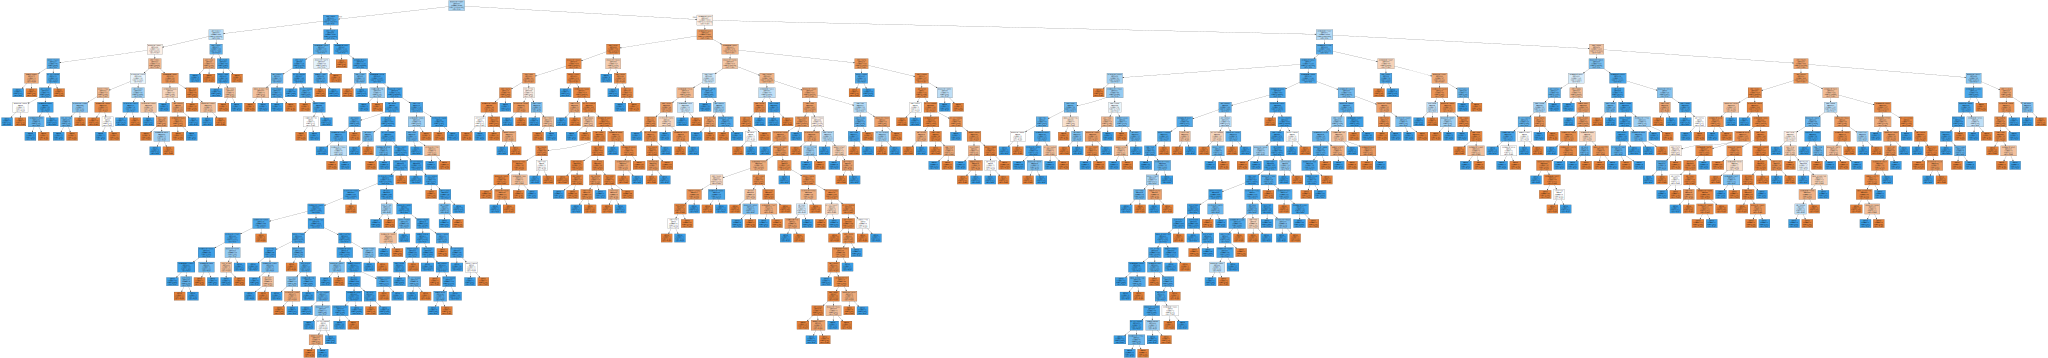

In [21]:
graph = Source(export_graphviz(cls1, 
                               out_file=None,
                               feature_names=X_train.columns,
                               class_names=['false', 'true'],
                               filled = True))

display(SVG(graph.pipe(format='svg')))


style = "<style>svg{width:40% !important;height:70% !important;}</style>"
HTML(style)

### 2. Random forest

In [22]:
def randomForestDriver(X_train, X_test, y_train, y_test, driver_silent=True, max_depth=None,
                       criterion='gini', max_features='auto', min_samples_leaf=1, n_estimators=100):
    cls = RandomForestClassifier(random_state=1, criterion=criterion, max_depth=max_depth,
                                 max_features=max_features, min_samples_leaf=min_samples_leaf, n_estimators=n_estimators)
    cls.fit(X_train, y_train)
    
    pred_train = cls.predict(X_train)
    pred_test = cls.predict(X_test)
    
    return cls, *report_generator(pred_train, pred_test, y_train, y_test, driver_silent)

In [23]:
cls2, train_report2, test_report2 = randomForestDriver(X_train, X_test, y_train, y_test, driver_silent=False)

Predicting for train dataset:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2294
         1.0       1.00      1.00      1.00      4186

    accuracy                           1.00      6480
   macro avg       1.00      1.00      1.00      6480
weighted avg       1.00      1.00      1.00      6480

Predicting for test dataset:
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1179
         1.0       0.92      0.94      0.93      2013

    accuracy                           0.91      3192
   macro avg       0.91      0.90      0.90      3192
weighted avg       0.91      0.91      0.91      3192



**Vyhodnotenie Random forest podľa natrénovaných pravidiel pomocou metrík**

Podľa tohto výsledku je zjavné, že nastal overfitting.

**Vizualizácia natrénovaných pravidiel:**

Výsledný strom sa uloží ako png súbor

clf = cls2
graph = Source(export_graphviz(clf.estimators_[0], feature_names=X_train.columns, class_names=['false','true'], filled = True), format='png')
graph

Model RandomForest na vizualizáciu obsahuje v našom prípade prvý Decision tree v celom RandomForest. (clf.estimators_[0])

graph.render('rf')
Image(filename='rf.png') 

graph = Source(export_graphviz(cls2, 
                               out_file=None,
                               feature_names=X_train.columns,
                               class_names=['false', 'true'],
                               filled = True))

display(SVG(graph.pipe(format='svg')))


style = "<style>svg{width:40% !important;height:70% !important;}</style>"
HTML(style)

Rozhodli sme sa ďalej pracovať s RandomForest algoritmom. Hoci aj ten nám vytvoril overfitting, ale vo všeobecnosti dosahuje lepšie výsledky.

## 3. Optimalizácia - hyperparameter tuning (5b)
* Preskúmajte hyperparametre Vášho zvoleného klasifikačného algoritmu v druhom kroku a vyskúšajte ich rôzne nastavenie tak, aby ste minimalizovali overfitting (preučenie) a optimalizovali výsledok. 
* Vysvetlite, čo jednotlivé hyperparametre robia. Pri nastavovaní hyperparametrov algoritmu využite krížovú validáciu (cross validation) na trénovacej množine.

Klasifikačný algoritmus RandomForest má dokopy 18 parametrov, z toho 7 je kľučových:
- max_depth
- min_sample_split
- max_leaf_nodes
- min_samples_leaf
- n_estimators
- max_sample (bootstrap sample)
- max_features

Aby sme optimalizovali parametre, a tak vylepšili úspešnosť, pričom príliš nezaťažili naše výpočtové zdroje, rozhodli sme sa použiť tieto:
- max_depth: maximálna hĺbka stromu (10, 20, 30, 40)
- criterion: funkcia na meranie kvality rozdelenia (gini, entropy)
- max_features: maximálny počet atribútov, ktorý je potrebné zvážiť počas každého delenia (log2, 1 - 10)
- n_estimators: počet stromov pred priemerovaním predikcií (5, 10, 50, 100, 200)
- min_sample_leaf: minimálny počet vzoriek, ktoré majú pripadnúť na jeden leaf node (2, 5, 10, 20, 50)

Na zvýšenie rýchlosti vykonávania sme sa rozhodli pridať parameter random_state a neobmedzili sme počet procesorov, na ktorých pôjde výpočet (n_jobs).

Parameter verbose slúži na to, koľko výpisov má zobraziť. My sme použili verbose=1, aby sme základé výpisy videli, ako napr. počet kandidátov a počet fits.

In [24]:
params = {
    'max_depth': [10, 20, 30, 40],
    'criterion': ['gini', 'entropy'],
    'max_features': ['log2', 2, 4, 5, 6, 8, 10],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10,25,30,50]
}

In [25]:
cls = RandomForestClassifier(random_state=1)

#### GridSearch Cross Validation

In [26]:
gridCV = GridSearchCV(cls, params, cv=3, verbose=1, n_jobs=-1)

*Trvá pomerne dlho*

In [27]:
gridCV.fit(X_train, y_train)

Fitting 3 folds for each of 896 candidates, totalling 2688 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'max_features': ['log2', 2, 4, 5, 6, 8, 10],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 25, 30, 50]},
             verbose=1)

In [28]:
gridCV.best_score_

0.9300925925925926

In [29]:
bestGrid = gridCV.best_estimator_
bestGrid

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=10,
                       min_samples_leaf=5, n_estimators=30, random_state=1)

In [30]:
gridPred_train = bestGrid.predict(X_train)
gridPred = bestGrid.predict(X_test)

In [31]:
print(classification_report(y_train, gridPred_train)) 

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2294
         1.0       0.97      0.99      0.98      4186

    accuracy                           0.97      6480
   macro avg       0.97      0.97      0.97      6480
weighted avg       0.97      0.97      0.97      6480



In [32]:
print(classification_report(y_test, gridPred)) 

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      1179
         1.0       0.94      0.95      0.94      2013

    accuracy                           0.93      3192
   macro avg       0.93      0.92      0.92      3192
weighted avg       0.93      0.93      0.93      3192



#### RandomizedSearch Cross Validation

In [33]:
randomCV = RandomizedSearchCV(cls, params, cv=7, verbose=1, n_jobs=-1)

In [34]:
randomCV.fit(X_train,y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['log2', 2, 4, 5, 6, 8,
                                                         10],
                                        'min_samples_leaf': [5, 10, 20, 50],
                                        'n_estimators': [10, 25, 30, 50]},
                   verbose=1)

In [35]:
randomCV.best_score_

0.9291631711934087

In [36]:
bestRandom = randomCV.best_estimator_
bestRandom

RandomForestClassifier(criterion='entropy', max_depth=30, max_features=10,
                       min_samples_leaf=10, n_estimators=50, random_state=1)

In [37]:
randomPred_train = bestRandom.predict(X_train)
randomPred = bestRandom.predict(X_test)

In [38]:
print(classification_report(y_train, randomPred_train)) 

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      2294
         1.0       0.96      0.97      0.97      4186

    accuracy                           0.96      6480
   macro avg       0.96      0.95      0.96      6480
weighted avg       0.96      0.96      0.96      6480



In [39]:
print(classification_report(y_test, randomPred)) 

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      1179
         1.0       0.94      0.95      0.94      2013

    accuracy                           0.93      3192
   macro avg       0.92      0.92      0.92      3192
weighted avg       0.93      0.93      0.93      3192



#### Aplikovanie zvolených najlepších hodnôt hyperparametrov do driver funkcie

In [40]:
cls3, train_report3, test_report3 = randomForestDriver(X_train, X_test, y_train, y_test, driver_silent=False,
                   criterion='entropy', max_depth=20, max_features=10, min_samples_leaf=5, n_estimators=30)

Predicting for train dataset:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2294
         1.0       0.97      0.99      0.98      4186

    accuracy                           0.97      6480
   macro avg       0.97      0.97      0.97      6480
weighted avg       0.97      0.97      0.97      6480

Predicting for test dataset:
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      1179
         1.0       0.94      0.95      0.94      2013

    accuracy                           0.93      3192
   macro avg       0.93      0.92      0.92      3192
weighted avg       0.93      0.93      0.93      3192



In [41]:
cls4, train_report4, test_report4 = randomForestDriver(X_train, X_test, y_train, y_test, driver_silent=False,
                   max_depth=10, max_features=10, min_samples_leaf=5, n_estimators=25)

Predicting for train dataset:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      2294
         1.0       0.96      0.97      0.97      4186

    accuracy                           0.96      6480
   macro avg       0.96      0.95      0.96      6480
weighted avg       0.96      0.96      0.96      6480

Predicting for test dataset:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      1179
         1.0       0.94      0.94      0.94      2013

    accuracy                           0.92      3192
   macro avg       0.92      0.92      0.92      3192
weighted avg       0.92      0.92      0.92      3192



## 4. Vyhodnotenie vplyvu zvolenej stratégie riešenia na klasifikáciu (5b)
Vyhodnotíte Vami zvolené stratégie riešenia projektu z hľadiska classification accuracy: 

* Stratégie riešenia chýbajúcich hodnôt a outlierov;
* Scaling resp. transformer či zlepší accuracy klasifikácie;
* Výber atribútov a výber algoritmov;
* Hyperparameter tuning resp. ensemble learning.

Ktorý spôsob z každého hore-uvedených bodov sa ukázal ako vhodnejší pre daný problém? Vyhodnotenie podložíte dôkazmi.

In [42]:
original_data = phase1()

In [43]:
def process_data(pipeline, original_data):
    preprocessed_data = pipeline.fit_transform(original_data)
    X_train, X_test, y_train, y_test = train_test_split(preprocessed_data.drop(['indicator'], axis=1), 
                                                    preprocessed_data['indicator'], test_size=0.33, random_state=1)
    return X_train, X_test, y_train, y_test

In [44]:
def generate_pipelines():
    na = [['nothing', None], ['remove', None], ['replace', 'mean'], ['replace', 'median'], ['replace', 'kNN']]
    out = ['nothing', 'remove', 'replace']
    tran = ['nothing', 'power', 'quan', 'minmax', 'standard']
    attr = ['all', ['leukocyty', 'etytr', 'hematokrit','alp', 'ast', 'indicator']]
    
    pipelines = []
    settings = []

    for a in na:
        for b in out:
            for c in tran:
                for d in attr:
                    p1 = pipelineGenerator(na_method=a[0], na_strategy=a[1], outliers_method=b, tranformation_method=c, 
                                  select_attributes=d)
                    pipelines.append(p1)
                    settings.append([a, b, c, d])

    return pipelines, settings

In [45]:
pipelines, settings = generate_pipelines()

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def try_algo(algo):
    accuracies = []

    for count, pipeline in enumerate(pipelines):

        try:
            X_train, X_test, y_train, y_test = process_data(pipeline, original_data)
        except:
            print("Pipeline", count, "processing error")
            continue

        try:
            cls, train_report, test_report = algo(X_train, X_test, y_train, y_test, driver_silent=True)
        except:
            print("Pipeline", count, "algorithm error")
            continue

        accuracies.append([count, test_report['accuracy']])
        print("Pipeline", count, "finished")
        
    return accuracies

In [47]:
def evaluate_algo(accuracies):
    nas = [['nothing', None], ['remove', None], ['replace', 'mean'], ['replace', 'median'], ['replace', 'kNN']]
    outs = ['nothing', 'remove', 'replace']
    trans = ['nothing', 'power', 'quan', 'minmax', 'standard']
    attrs = ['all', ['leukocyty', 'etytr', 'hematokrit','alp', 'ast', 'indicator']]


    for na in nas:
        maxna = 0
        maxsettings = []
        for acc in accuracies:
            if settings[acc[0]][0] == na and acc[1] > maxna:
                maxna = acc[1]
                maxsettings = settings[acc[0]]
        print("For NA strategy {} is max accuracy {} with settings {}".format(na, maxna, maxsettings))

    for out in outs:
        maxout = 0
        maxsettings = []
        for acc in accuracies:
            if settings[acc[0]][1] == out and acc[1] > maxout:
                maxout = acc[1]
                maxsettings = settings[acc[0]]
        print("For OUT strategy {} is max accuracy {} with settings {}".format(out, maxout, maxsettings))

    for tran in trans:
        maxtran = 0
        maxsettings = []
        for acc in accuracies:
            if settings[acc[0]][2] == tran and acc[1] > maxtran:
                maxtran = acc[1]
                maxsettings = settings[acc[0]]
        print("For TRANS strategy {} is max accuracy {} with settings {}".format(tran, maxtran, maxsettings))

    for attr in attrs:
        maxattr = 0
        maxsettings = []
        for acc in accuracies:
            if settings[acc[0]][3] == attr and acc[1] > maxattr:
                maxattr = acc[1]
                maxsettings = settings[acc[0]]
        print("For ATTR strategy {} is max accuracy {} with settings {}".format(attr, maxattr, maxsettings))

    maxacc = 0
    maxcount = 0
    for acc in accuracies:
        if acc[1] > maxacc:
            maxacc = acc[1]
            maxcount = acc[0]

    print('''\nNajlepšiu accuracy {} pre Random forest dosiahla kombinácia parametrov {}:
          na_method={}, na_strategy={}, outliers_method={}, tranformation_method={}, select_attributes={}
          '''.format(maxacc, maxcount, settings[maxcount][0][0], settings[maxcount][0][1], settings[maxcount][1], settings[maxcount][2], settings[maxcount][3]))
    
    pipeline = pipelineGenerator(na_method=settings[maxcount][0][0], na_strategy=settings[maxcount][0][1], 
                    outliers_method=settings[maxcount][1], 
                      tranformation_method=settings[maxcount][2], select_attributes=settings[maxcount][3])
    return pipeline
        

### Decision Tree

In [48]:
accuracies_decision = try_algo(decisionTreeDriver)

Pipeline 0 algorithm error
Pipeline 1 algorithm error
Pipeline 2 algorithm error
Pipeline 3 algorithm error
Pipeline 4 algorithm error
Pipeline 5 algorithm error
Pipeline 6 algorithm error
Pipeline 7 algorithm error
Pipeline 8 algorithm error
Pipeline 9 algorithm error
Pipeline 10 processing error
Pipeline 11 processing error
Pipeline 12 processing error
Pipeline 13 processing error
Pipeline 14 processing error
Pipeline 15 processing error
Pipeline 16 processing error
Pipeline 17 processing error
Pipeline 18 processing error
Pipeline 19 processing error
Pipeline 20 algorithm error
Pipeline 21 algorithm error
Pipeline 22 algorithm error
Pipeline 23 algorithm error
Pipeline 24 algorithm error
Pipeline 25 algorithm error
Pipeline 26 algorithm error
Pipeline 27 algorithm error
Pipeline 28 algorithm error
Pipeline 29 algorithm error
Pipeline 30 finished
Pipeline 31 finished
Pipeline 32 algorithm error
Pipeline 33 algorithm error
Pipeline 34 algorithm error
Pipeline 35 algorithm error
Pipeli

In [49]:
best_pipeline_decision = evaluate_algo(accuracies_decision)

For NA strategy ['nothing', None] is max accuracy 0 with settings []
For NA strategy ['remove', None] is max accuracy 0.8853383458646616 with settings [['remove', None], 'replace', 'nothing', 'all']
For NA strategy ['replace', 'mean'] is max accuracy 0.8836716146622235 with settings [['replace', 'mean'], 'nothing', 'minmax', 'all']
For NA strategy ['replace', 'median'] is max accuracy 0.8876098152075129 with settings [['replace', 'median'], 'nothing', 'quan', 'all']
For NA strategy ['replace', 'kNN'] is max accuracy 0.8836716146622235 with settings [['replace', 'kNN'], 'nothing', 'minmax', 'all']
For OUT strategy nothing is max accuracy 0.8876098152075129 with settings [['replace', 'median'], 'nothing', 'quan', 'all']
For OUT strategy remove is max accuracy 0.8810100311310965 with settings [['replace', 'median'], 'remove', 'nothing', 'all']
For OUT strategy replace is max accuracy 0.8853383458646616 with settings [['remove', None], 'replace', 'nothing', 'all']
For TRANS strategy nothin

### Random Forest

In [50]:
accuracies_forest = try_algo(randomForestDriver)

Pipeline 0 algorithm error
Pipeline 1 algorithm error
Pipeline 2 algorithm error
Pipeline 3 algorithm error
Pipeline 4 algorithm error
Pipeline 5 algorithm error
Pipeline 6 algorithm error
Pipeline 7 algorithm error
Pipeline 8 algorithm error
Pipeline 9 algorithm error
Pipeline 10 processing error
Pipeline 11 processing error
Pipeline 12 processing error
Pipeline 13 processing error
Pipeline 14 processing error
Pipeline 15 processing error
Pipeline 16 processing error
Pipeline 17 processing error
Pipeline 18 processing error
Pipeline 19 processing error
Pipeline 20 algorithm error
Pipeline 21 algorithm error
Pipeline 22 algorithm error
Pipeline 23 algorithm error
Pipeline 24 algorithm error
Pipeline 25 algorithm error
Pipeline 26 algorithm error
Pipeline 27 algorithm error
Pipeline 28 algorithm error
Pipeline 29 algorithm error
Pipeline 30 finished
Pipeline 31 finished
Pipeline 32 algorithm error
Pipeline 33 algorithm error
Pipeline 34 algorithm error
Pipeline 35 algorithm error
Pipeli

In [51]:
best_pipeline_forest = evaluate_algo(accuracies_forest)

For NA strategy ['nothing', None] is max accuracy 0 with settings []
For NA strategy ['remove', None] is max accuracy 0.9254370317516946 with settings [['remove', None], 'remove', 'nothing', 'all']
For NA strategy ['replace', 'mean'] is max accuracy 0.9291123901847925 with settings [['replace', 'mean'], 'nothing', 'quan', 'all']
For NA strategy ['replace', 'median'] is max accuracy 0.9294361812521619 with settings [['replace', 'median'], 'remove', 'nothing', 'all']
For NA strategy ['replace', 'kNN'] is max accuracy 0.9291123901847925 with settings [['replace', 'kNN'], 'nothing', 'quan', 'all']
For OUT strategy nothing is max accuracy 0.9291123901847925 with settings [['replace', 'mean'], 'nothing', 'quan', 'all']
For OUT strategy remove is max accuracy 0.9294361812521619 with settings [['replace', 'median'], 'remove', 'nothing', 'all']
For OUT strategy replace is max accuracy 0.9206301120872463 with settings [['replace', 'median'], 'replace', 'power', 'all']
For TRANS strategy nothing 

### Najlepšie získané nastavenie parametrov

In [52]:
X_train, X_test, y_train, y_test = process_data(best_pipeline_forest, original_data)

#### 

In [53]:
cls5, train_report5, test_report5 = randomForestDriver(X_train, X_test, y_train, y_test, driver_silent=False)

Predicting for train dataset:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2106
         1.0       1.00      1.00      1.00      3763

    accuracy                           1.00      5869
   macro avg       1.00      1.00      1.00      5869
weighted avg       1.00      1.00      1.00      5869

Predicting for test dataset:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       992
         1.0       0.94      0.95      0.95      1899

    accuracy                           0.93      2891
   macro avg       0.92      0.92      0.92      2891
weighted avg       0.93      0.93      0.93      2891



In [54]:
test_report5['accuracy']

0.9294361812521619

#### Najlepšie hyperparametre z bodu 3

In [55]:
cls6, train_report6, test_report6 = randomForestDriver(X_train, X_test, y_train, y_test, driver_silent=False,
                   criterion='entropy', max_depth=20, max_features=10, min_samples_leaf=5, n_estimators=30)

Predicting for train dataset:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2106
         1.0       0.97      0.98      0.98      3763

    accuracy                           0.97      5869
   macro avg       0.97      0.97      0.97      5869
weighted avg       0.97      0.97      0.97      5869

Predicting for test dataset:
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       992
         1.0       0.95      0.95      0.95      1899

    accuracy                           0.93      2891
   macro avg       0.93      0.93      0.93      2891
weighted avg       0.93      0.93      0.93      2891



In [56]:
test_report6['accuracy']

0.9349705984088551

#### Úpravené najlepšie hyperparametre z bodu 3

In [57]:
cls7, train_report7, test_report7 = randomForestDriver(X_train, X_test, y_train, y_test, driver_silent=False,
                criterion='entropy', max_depth=20, max_features=10, min_samples_leaf=5, n_estimators=50)

Predicting for train dataset:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2106
         1.0       0.97      0.98      0.98      3763

    accuracy                           0.97      5869
   macro avg       0.97      0.97      0.97      5869
weighted avg       0.97      0.97      0.97      5869

Predicting for test dataset:
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       992
         1.0       0.95      0.95      0.95      1899

    accuracy                           0.94      2891
   macro avg       0.93      0.93      0.93      2891
weighted avg       0.94      0.94      0.94      2891



In [58]:
test_report7['accuracy']

0.936008301625735

Správa sa odovzdáva v 12. týždni semestra
* Na cvičení, dvojica svojmu cvičiacemu odprezentuje vykonanú prácu v Jupyter Notebooku.
* Správu elektronicky odovzdá jeden člen z dvojice do systému AIS do nedele 12.12.2021 23:59.